In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:90%;}
div.CodeMirror {font-family:Consolas; font-size:18pt;}
div.output {font-size:19pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:19pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
span.toc-item-num{display:none;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
div.CodeMirror-lines > div {padding-left:10px;}
table.dataframe{font-size:19px;}
</style>
"""))

- mnist를 DNN으로 구현 : https://sdc-james.gitbook.io/onebook/4.-and/5.1./5.1.3.-mnist-dataset
- 콜백함수

## 데이터셋을 라이브러리에서 가져올 예정. 파일 load

In [44]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist # mnist데이터셋
from tensorflow.keras.utils import to_categorical # 원핫 인코딩
from tensorflow.keras.models import Sequential # 모델생성
from tensorflow.keras.layers import Dense,Input
from matplotlib import pyplot as plt # 학습과정 loss, acc 볼때 사용
np.random.seed(4)

In [3]:
data = np.loadtxt('data/mnist_train_small.csv', delimiter=',', skiprows=1)
data.shape

(100, 785)

In [14]:
for row in data[0,1:].reshape(28,-1):
    for pixel in row:
        print('{:3.0f}'.format(pixel),end=' ')
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

3.0

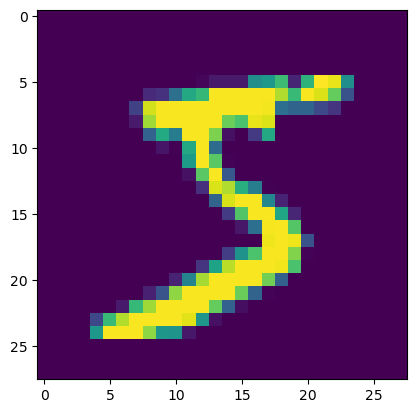

In [15]:
plt.imshow(data[0,1:].reshape(28,-1))
data[7,0]

## 위의 과정보다 더 많은 데이터를 라이브러리에서 가져옴


## 1. 데이터생성 & 전처리

In [38]:
((X_train,Y_train),(X_test,Y_test))=mnist.load_data()
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [39]:
for row in X_train[123]:
    for pixel in row:
        print('{:3.0f}'.format(pixel),end=' ')
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0  38 113 113 113 114 238 253 253 253 255 206  88   0   0 

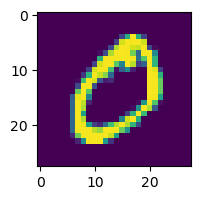

In [40]:
plt.figure(figsize = (2,2))
plt.imshow(X_train[1])
plt.show()

In [41]:
# 훈련셋(6만개)에서 훈련센(5만개)와 검증셋(만개)을 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]



In [42]:
# 훈련셋(학습시 사용),검증셋(fit시 사용), 시험셋(평가시사용)
print(X_train.shape,Y_train.shape)
print(X_val.shape,Y_val.shape)
print(X_test.shape,Y_test.shape)


(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)
(10000, 28, 28) (10000,)


In [43]:
# 독립변수 전처리 :(5000,28,28) ->(50000,784)-> 실수형변환 -> 스케일조정(255.00으로나눠)
X_train=X_train.reshape(-1,784).astype('float32')/255.0
X_val = X_val.reshape(-1,784).astype('float32')/255.0
X_test = X_test.reshape(-1,784).astype('float32')/255.0
X_train.shape,X_val.shape,X_test.shape

((50000, 784), (10000, 784), (10000, 784))

In [44]:
# 훈련셋(5만)과 검증셋(만)-> 700개,300개만 random으로 choice
train_idxs=np.random.choice(50000,700)
val_idxs=np.random.choice(10000,300)

X_train= X_train[train_idxs]
Y_train= Y_train[train_idxs]
X_val = X_val[val_idxs]
Y_val = Y_val[val_idxs]

5


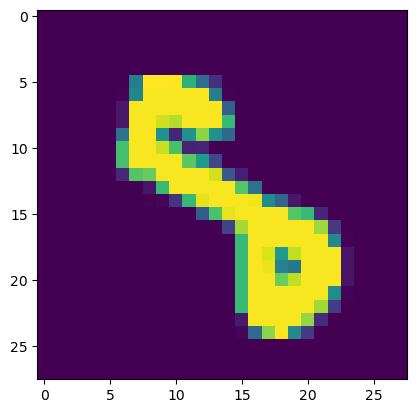

In [46]:
plt.imshow(X_train[5].reshape(-1,28))
print(Y_train[5])

In [49]:
# 종속변수 전처리: 원핫 인코딩(to_categorical(넘파이배열)pd.get_dummies(데이터프레임을 반환))
print('원핫인코딩 전 shape:',Y_train.shape,Y_val.shape,Y_test.shape)
#원핫인코딩
Y_train = to_categorical(Y_train,10)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)
print('원핫인코딩 전 shape:',Y_train.shape,Y_val.shape,Y_test.shape)

원핫인코딩 전 shape: (700,) (300,) (10000,)
원핫인코딩 전 shape: (700, 10) (300, 10) (10000, 10)


In [50]:
Y_train[0].argmax()

5

## 2. 모델구성하기

In [51]:
model= Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2,activation='relu'))
model.add(Dense(units=10,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 1570      
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


## 3.모델학습과정 설정

In [54]:
model.compile(loss='categorical_crossentropy',optimizer = 'sgd',metrics=['accuracy'])

## 4.모델학습

In [55]:
hist = model.fit(X_train, Y_train , epochs=1200,batch_size=100,
                validation_data=(X_val,Y_val))

Epoch 1/1200
7/7 [==============================] - 2s 37ms/step - loss: 2.3339 - accuracy: 0.0857 - val_loss: 2.3274 - val_accuracy: 0.1233
Epoch 2/1200
7/7 [==============================] - 0s 10ms/step - loss: 2.3178 - accuracy: 0.0971 - val_loss: 2.3171 - val_accuracy: 0.1333
Epoch 3/1200
7/7 [==============================] - 0s 10ms/step - loss: 2.3091 - accuracy: 0.1100 - val_loss: 2.3109 - val_accuracy: 0.1300
Epoch 4/1200
7/7 [==============================] - 0s 13ms/step - loss: 2.3046 - accuracy: 0.1200 - val_loss: 2.3074 - val_accuracy: 0.1333
Epoch 5/1200
7/7 [==============================] - 0s 9ms/step - loss: 2.3015 - accuracy: 0.1271 - val_loss: 2.3048 - val_accuracy: 0.1400
Epoch 6/1200
7/7 [==============================] - 0s 9ms/step - loss: 2.2990 - accuracy: 0.1329 - val_loss: 2.3028 - val_accuracy: 0.1467
Epoch 7/1200
7/7 [==============================] - 0s 9ms/step - loss: 2.2971 - accuracy: 0.1443 - val_loss: 2.3011 - val_accuracy: 0.1500
Epoch 8/1200
7/7

7/7 [==============================] - 0s 9ms/step - loss: 2.0743 - accuracy: 0.2657 - val_loss: 2.0820 - val_accuracy: 0.2400
Epoch 60/1200
7/7 [==============================] - 0s 9ms/step - loss: 2.0714 - accuracy: 0.2686 - val_loss: 2.0790 - val_accuracy: 0.2400
Epoch 61/1200
7/7 [==============================] - 0s 9ms/step - loss: 2.0678 - accuracy: 0.2729 - val_loss: 2.0758 - val_accuracy: 0.2400
Epoch 62/1200
7/7 [==============================] - 0s 8ms/step - loss: 2.0647 - accuracy: 0.2700 - val_loss: 2.0729 - val_accuracy: 0.2467
Epoch 63/1200
7/7 [==============================] - 0s 9ms/step - loss: 2.0615 - accuracy: 0.2729 - val_loss: 2.0699 - val_accuracy: 0.2467
Epoch 64/1200
7/7 [==============================] - 0s 9ms/step - loss: 2.0585 - accuracy: 0.2714 - val_loss: 2.0673 - val_accuracy: 0.2467
Epoch 65/1200
7/7 [==============================] - 0s 8ms/step - loss: 2.0554 - accuracy: 0.2757 - val_loss: 2.0645 - val_accuracy: 0.2467
Epoch 66/1200
7/7 [========

7/7 [==============================] - 0s 8ms/step - loss: 1.9334 - accuracy: 0.3057 - val_loss: 1.9497 - val_accuracy: 0.2767
Epoch 118/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.9318 - accuracy: 0.3043 - val_loss: 1.9479 - val_accuracy: 0.2767
Epoch 119/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.9295 - accuracy: 0.3086 - val_loss: 1.9461 - val_accuracy: 0.2767
Epoch 120/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.9277 - accuracy: 0.3057 - val_loss: 1.9444 - val_accuracy: 0.2800
Epoch 121/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.9260 - accuracy: 0.3100 - val_loss: 1.9427 - val_accuracy: 0.2800
Epoch 122/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.9240 - accuracy: 0.3086 - val_loss: 1.9408 - val_accuracy: 0.2833
Epoch 123/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.9223 - accuracy: 0.3100 - val_loss: 1.9391 - val_accuracy: 0.2833
Epoch 124/1200
7/7 [=

Epoch 175/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.8355 - accuracy: 0.3443 - val_loss: 1.8584 - val_accuracy: 0.3167
Epoch 176/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.8340 - accuracy: 0.3400 - val_loss: 1.8569 - val_accuracy: 0.3167
Epoch 177/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.8324 - accuracy: 0.3457 - val_loss: 1.8555 - val_accuracy: 0.3200
Epoch 178/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.8309 - accuracy: 0.3457 - val_loss: 1.8541 - val_accuracy: 0.3200
Epoch 179/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.8294 - accuracy: 0.3443 - val_loss: 1.8527 - val_accuracy: 0.3200
Epoch 180/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.8277 - accuracy: 0.3457 - val_loss: 1.8514 - val_accuracy: 0.3200
Epoch 181/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.8266 - accuracy: 0.3400 - val_loss: 1.8500 - val_accuracy: 0.3200
Epoch 

Epoch 233/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.7524 - accuracy: 0.3700 - val_loss: 1.7845 - val_accuracy: 0.3600
Epoch 234/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.7512 - accuracy: 0.3671 - val_loss: 1.7834 - val_accuracy: 0.3600
Epoch 235/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.7499 - accuracy: 0.3686 - val_loss: 1.7823 - val_accuracy: 0.3600
Epoch 236/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.7484 - accuracy: 0.3671 - val_loss: 1.7812 - val_accuracy: 0.3600
Epoch 237/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.7471 - accuracy: 0.3686 - val_loss: 1.7799 - val_accuracy: 0.3600
Epoch 238/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.7460 - accuracy: 0.3700 - val_loss: 1.7788 - val_accuracy: 0.3600
Epoch 239/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.7447 - accuracy: 0.3743 - val_loss: 1.7777 - val_accuracy: 0.3600
Epoch

Epoch 291/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.6821 - accuracy: 0.3943 - val_loss: 1.7247 - val_accuracy: 0.3833
Epoch 292/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.6809 - accuracy: 0.3943 - val_loss: 1.7237 - val_accuracy: 0.3833
Epoch 293/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.6799 - accuracy: 0.3929 - val_loss: 1.7228 - val_accuracy: 0.3833
Epoch 294/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.6787 - accuracy: 0.3929 - val_loss: 1.7219 - val_accuracy: 0.3867
Epoch 295/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.6775 - accuracy: 0.3914 - val_loss: 1.7210 - val_accuracy: 0.3833
Epoch 296/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.6764 - accuracy: 0.3943 - val_loss: 1.7202 - val_accuracy: 0.3833
Epoch 297/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.6753 - accuracy: 0.3943 - val_loss: 1.7192 - val_accuracy: 0.3800
Epoch 

Epoch 349/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.6219 - accuracy: 0.3986 - val_loss: 1.6785 - val_accuracy: 0.3933
Epoch 350/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.6210 - accuracy: 0.3986 - val_loss: 1.6781 - val_accuracy: 0.3867
Epoch 351/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.6199 - accuracy: 0.3986 - val_loss: 1.6773 - val_accuracy: 0.3933
Epoch 352/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.6190 - accuracy: 0.4029 - val_loss: 1.6766 - val_accuracy: 0.3933
Epoch 353/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.6182 - accuracy: 0.3986 - val_loss: 1.6759 - val_accuracy: 0.3967
Epoch 354/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.6170 - accuracy: 0.4000 - val_loss: 1.6753 - val_accuracy: 0.3933
Epoch 355/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.6163 - accuracy: 0.4000 - val_loss: 1.6746 - val_accuracy: 0.3900
Epoch 

Epoch 407/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.5704 - accuracy: 0.4171 - val_loss: 1.6441 - val_accuracy: 0.3900
Epoch 408/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.5697 - accuracy: 0.4143 - val_loss: 1.6436 - val_accuracy: 0.3900
Epoch 409/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.5689 - accuracy: 0.4143 - val_loss: 1.6430 - val_accuracy: 0.3900
Epoch 410/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.5678 - accuracy: 0.4129 - val_loss: 1.6424 - val_accuracy: 0.3900
Epoch 411/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.5672 - accuracy: 0.4143 - val_loss: 1.6420 - val_accuracy: 0.3867
Epoch 412/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.5666 - accuracy: 0.4143 - val_loss: 1.6416 - val_accuracy: 0.3867
Epoch 413/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.5654 - accuracy: 0.4129 - val_loss: 1.6411 - val_accuracy: 0.3867
Epoch 

Epoch 465/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.5255 - accuracy: 0.4271 - val_loss: 1.6152 - val_accuracy: 0.3833
Epoch 466/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.5245 - accuracy: 0.4271 - val_loss: 1.6148 - val_accuracy: 0.3867
Epoch 467/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.5239 - accuracy: 0.4271 - val_loss: 1.6143 - val_accuracy: 0.3867
Epoch 468/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.5233 - accuracy: 0.4286 - val_loss: 1.6139 - val_accuracy: 0.3833
Epoch 469/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.5223 - accuracy: 0.4243 - val_loss: 1.6135 - val_accuracy: 0.3833
Epoch 470/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.5217 - accuracy: 0.4286 - val_loss: 1.6131 - val_accuracy: 0.3867
Epoch 471/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.5211 - accuracy: 0.4286 - val_loss: 1.6127 - val_accuracy: 0.3867
Epoch 

Epoch 523/1200
7/7 [==============================] - 0s 12ms/step - loss: 1.4860 - accuracy: 0.4329 - val_loss: 1.5924 - val_accuracy: 0.3933
Epoch 524/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.4849 - accuracy: 0.4343 - val_loss: 1.5921 - val_accuracy: 0.3933
Epoch 525/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.4846 - accuracy: 0.4314 - val_loss: 1.5917 - val_accuracy: 0.3933
Epoch 526/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.4838 - accuracy: 0.4343 - val_loss: 1.5914 - val_accuracy: 0.3933
Epoch 527/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.4833 - accuracy: 0.4357 - val_loss: 1.5909 - val_accuracy: 0.3967
Epoch 528/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.4825 - accuracy: 0.4314 - val_loss: 1.5907 - val_accuracy: 0.3967
Epoch 529/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.4821 - accuracy: 0.4329 - val_loss: 1.5905 - val_accuracy: 0.3933
Epoch

Epoch 581/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.4515 - accuracy: 0.4371 - val_loss: 1.5749 - val_accuracy: 0.3833
Epoch 582/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.4509 - accuracy: 0.4357 - val_loss: 1.5745 - val_accuracy: 0.3833
Epoch 583/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.4504 - accuracy: 0.4357 - val_loss: 1.5743 - val_accuracy: 0.3833
Epoch 584/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.4498 - accuracy: 0.4371 - val_loss: 1.5739 - val_accuracy: 0.3833
Epoch 585/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.4492 - accuracy: 0.4357 - val_loss: 1.5737 - val_accuracy: 0.3833
Epoch 586/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.4487 - accuracy: 0.4329 - val_loss: 1.5735 - val_accuracy: 0.3900
Epoch 587/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.4482 - accuracy: 0.4329 - val_loss: 1.5731 - val_accuracy: 0.3833
Epoch 

Epoch 639/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.4213 - accuracy: 0.4414 - val_loss: 1.5612 - val_accuracy: 0.3800
Epoch 640/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.4211 - accuracy: 0.4371 - val_loss: 1.5611 - val_accuracy: 0.3800
Epoch 641/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.4205 - accuracy: 0.4400 - val_loss: 1.5609 - val_accuracy: 0.3800
Epoch 642/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.4200 - accuracy: 0.4357 - val_loss: 1.5606 - val_accuracy: 0.3867
Epoch 643/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.4196 - accuracy: 0.4386 - val_loss: 1.5604 - val_accuracy: 0.3867
Epoch 644/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.4194 - accuracy: 0.4357 - val_loss: 1.5603 - val_accuracy: 0.3867
Epoch 645/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.4187 - accuracy: 0.4400 - val_loss: 1.5602 - val_accuracy: 0.3800
Epoch 

Epoch 697/1200
7/7 [==============================] - 0s 11ms/step - loss: 1.3953 - accuracy: 0.4514 - val_loss: 1.5512 - val_accuracy: 0.3933
Epoch 698/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3946 - accuracy: 0.4514 - val_loss: 1.5510 - val_accuracy: 0.3900
Epoch 699/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3939 - accuracy: 0.4500 - val_loss: 1.5510 - val_accuracy: 0.3900
Epoch 700/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3937 - accuracy: 0.4471 - val_loss: 1.5508 - val_accuracy: 0.3900
Epoch 701/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.3931 - accuracy: 0.4486 - val_loss: 1.5507 - val_accuracy: 0.3900
Epoch 702/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3930 - accuracy: 0.4486 - val_loss: 1.5506 - val_accuracy: 0.3900
Epoch 703/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.3923 - accuracy: 0.4500 - val_loss: 1.5504 - val_accuracy: 0.3900
Epoch

Epoch 755/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.3708 - accuracy: 0.4514 - val_loss: 1.5429 - val_accuracy: 0.4067
Epoch 756/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.3706 - accuracy: 0.4586 - val_loss: 1.5428 - val_accuracy: 0.4100
Epoch 757/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.3700 - accuracy: 0.4600 - val_loss: 1.5427 - val_accuracy: 0.4100
Epoch 758/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.3694 - accuracy: 0.4600 - val_loss: 1.5425 - val_accuracy: 0.4100
Epoch 759/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.3695 - accuracy: 0.4586 - val_loss: 1.5423 - val_accuracy: 0.4133
Epoch 760/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.3689 - accuracy: 0.4586 - val_loss: 1.5421 - val_accuracy: 0.4100
Epoch 761/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.3685 - accuracy: 0.4586 - val_loss: 1.5420 - val_accuracy: 0.4100
Epoch 

Epoch 813/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3483 - accuracy: 0.4843 - val_loss: 1.5353 - val_accuracy: 0.4267
Epoch 814/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3477 - accuracy: 0.4814 - val_loss: 1.5351 - val_accuracy: 0.4367
Epoch 815/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.3472 - accuracy: 0.4800 - val_loss: 1.5349 - val_accuracy: 0.4400
Epoch 816/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.3469 - accuracy: 0.4843 - val_loss: 1.5348 - val_accuracy: 0.4367
Epoch 817/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.3468 - accuracy: 0.4843 - val_loss: 1.5348 - val_accuracy: 0.4333
Epoch 818/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3463 - accuracy: 0.4800 - val_loss: 1.5347 - val_accuracy: 0.4367
Epoch 819/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.3457 - accuracy: 0.4843 - val_loss: 1.5345 - val_accuracy: 0.4400
Epoch 

Epoch 871/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3264 - accuracy: 0.5086 - val_loss: 1.5285 - val_accuracy: 0.4500
Epoch 872/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3262 - accuracy: 0.5100 - val_loss: 1.5284 - val_accuracy: 0.4467
Epoch 873/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3258 - accuracy: 0.5086 - val_loss: 1.5284 - val_accuracy: 0.4467
Epoch 874/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3256 - accuracy: 0.5071 - val_loss: 1.5284 - val_accuracy: 0.4500
Epoch 875/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3251 - accuracy: 0.5100 - val_loss: 1.5282 - val_accuracy: 0.4467
Epoch 876/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3247 - accuracy: 0.5071 - val_loss: 1.5282 - val_accuracy: 0.4500
Epoch 877/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3245 - accuracy: 0.5100 - val_loss: 1.5281 - val_accuracy: 0.4500
Epoch 

Epoch 929/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3057 - accuracy: 0.5186 - val_loss: 1.5233 - val_accuracy: 0.4600
Epoch 930/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3053 - accuracy: 0.5129 - val_loss: 1.5233 - val_accuracy: 0.4600
Epoch 931/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.3048 - accuracy: 0.5186 - val_loss: 1.5232 - val_accuracy: 0.4500
Epoch 932/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.3046 - accuracy: 0.5143 - val_loss: 1.5231 - val_accuracy: 0.4533
Epoch 933/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3043 - accuracy: 0.5157 - val_loss: 1.5231 - val_accuracy: 0.4533
Epoch 934/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.3037 - accuracy: 0.5171 - val_loss: 1.5230 - val_accuracy: 0.4533
Epoch 935/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.3034 - accuracy: 0.5157 - val_loss: 1.5229 - val_accuracy: 0.4533
Epoch 

Epoch 987/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.2845 - accuracy: 0.5257 - val_loss: 1.5186 - val_accuracy: 0.4567
Epoch 988/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.2839 - accuracy: 0.5300 - val_loss: 1.5183 - val_accuracy: 0.4567
Epoch 989/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.2837 - accuracy: 0.5257 - val_loss: 1.5182 - val_accuracy: 0.4567
Epoch 990/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.2836 - accuracy: 0.5243 - val_loss: 1.5182 - val_accuracy: 0.4567
Epoch 991/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.2829 - accuracy: 0.5243 - val_loss: 1.5181 - val_accuracy: 0.4567
Epoch 992/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.2829 - accuracy: 0.5257 - val_loss: 1.5178 - val_accuracy: 0.4567
Epoch 993/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.2822 - accuracy: 0.5257 - val_loss: 1.5178 - val_accuracy: 0.4567
Epoch 

7/7 [==============================] - 0s 8ms/step - loss: 1.2433 - accuracy: 0.5314 - val_loss: 1.5114 - val_accuracy: 0.4633
Epoch 1102/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.2428 - accuracy: 0.5414 - val_loss: 1.5111 - val_accuracy: 0.4633
Epoch 1103/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.2426 - accuracy: 0.5371 - val_loss: 1.5110 - val_accuracy: 0.4633
Epoch 1104/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.2422 - accuracy: 0.5357 - val_loss: 1.5111 - val_accuracy: 0.4600
Epoch 1105/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.2418 - accuracy: 0.5400 - val_loss: 1.5110 - val_accuracy: 0.4633
Epoch 1106/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.2416 - accuracy: 0.5371 - val_loss: 1.5109 - val_accuracy: 0.4633
Epoch 1107/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.2412 - accuracy: 0.5400 - val_loss: 1.5111 - val_accuracy: 0.4633
Epoch 1108/1200

In [59]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

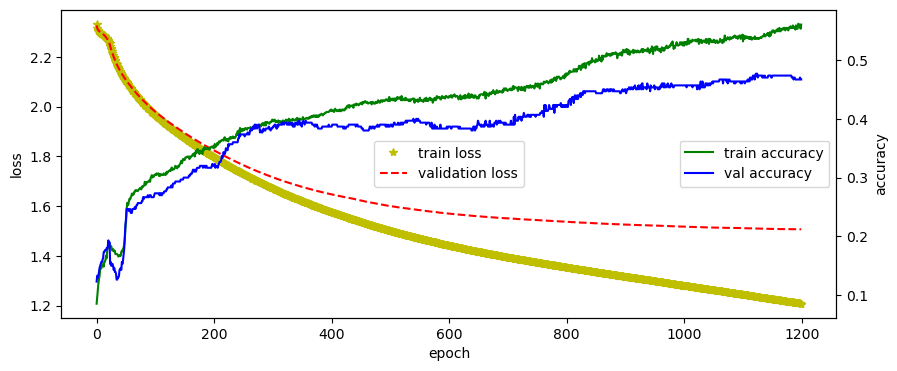

In [61]:
# 학습과정 중의 loss와 accuracy
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,4))
loss_ax.plot(hist.history['loss'],'y*',label='train loss')
loss_ax.plot(hist.history['val_loss'],'r--',label='validation loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'],'g',label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'],'b',label='val accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center')
acc_ax.legend(loc='center right')
plt.show()

## ※callback 함수 1

In [68]:
# 너무 자주 로그를 출력하면 지저분해질 수 있으니, 특정 에포크 간격마다 로그 출력하도록 제한
import tensorflow.keras.callbacks as callbacks
class CustomHistory(callbacks.Callback): # on_epoch_end()
    def __init__(self): # 생성자함수
        self.epoch=0
    def on_epoch_end(self, batch,logs={}):
        self.epoch += 1
        if self.epoch%50 ==5:
            print('epoch:{},loss:{},acc:{},val_loss:{},val_acc:{}'.\
                 format(self.epoch,logs.get('loss'),logs.get('accuracy'),logs.get('val_loss'),logs.get('val_accuracy')))
# 1번
((X_train,Y_train),(X_test,Y_test))=mnist.load_data()

#훈련셋(6만)= 5만개 +만개(val)
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

# 독립변수 전처리 :(5000,28,28) ->(50000,784)-> 실수형변환 -> 스케일조정(255.00으로나눠)
X_train=X_train.reshape(-1,784).astype('float32')/255.0
X_val = X_val.reshape(-1,784).astype('float32')/255.0
X_test = X_test.reshape(-1,784).astype('float32')/255.0
X_train.shape,X_val.shape,X_test.shape

# 훈련셋(5만)과 검증셋(만)-> 700개,300개만 random으로 choice
train_idxs=np.random.choice(50000,700)
val_idxs=np.random.choice(10000,300)

X_train= X_train[train_idxs]
Y_train= Y_train[train_idxs]
X_val = X_val[val_idxs]
Y_val = Y_val[val_idxs]

# 종속변수 전처리: 원핫 인코딩(to_categorical(넘파이배열)pd.get_dummies(데이터프레임을 반환))
print('원핫인코딩 전 shape:',Y_train.shape,Y_val.shape,Y_test.shape)
#원핫인코딩
Y_train = to_categorical(Y_train,10)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)
print('원핫인코딩 전 shape:',Y_train.shape,Y_val.shape,Y_test.shape)

# 모델구성하기
model= Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2,activation='relu'))
model.add(Dense(units=10,activation='softmax'))
model.summary()
# 모델 학습과정 설정
model.compile(loss='categorical_crossentropy',optimizer = 'sgd',metrics=['accuracy'])
# 모델 학습
customHistory = CustomHistory()
hist = model.fit(X_train, Y_train , epochs=1200,batch_size=100,
                validation_data=(X_val,Y_val),
                verbose=0,
                callbacks=[customHistory])


원핫인코딩 전 shape: (700,) (300,) (10000,)
원핫인코딩 전 shape: (700, 10) (300, 10) (10000, 10)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2)                 1570      
                                                                 
 dense_7 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________
epoch:5,loss:2.2904491424560547,acc:0.13428571820259094,val_loss:2.291691541671753,val_acc:0.1366666704416275
epoch:55,loss:1.9953149557113647,acc:0.2542857229709625,val_loss:2.0211942195892334,val_acc:0.21666666865348816
epoch:105,loss:1.8200205564498901,acc:0.3100000023841858,val_loss:1.8614003658294678,val_acc:0.27000001072883606
epoch:155,loss:1.72593057155

## ※callback 함수 2 - Early Stopping(조기종료)
- val_loss값이 늘어나면 지정한 epoch를 다 수행하지 않고 조기 종료

원핫인코딩 전 shape: (700,) (300,) (10000,)
원핫인코딩 전 shape: (700, 10) (300, 10) (10000, 10)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 2)                 1570      
                                                                 
 dense_11 (Dense)            (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
7/7 [==============================] - 1s 36ms/step - loss: 2.3810 - accuracy: 0.1000 - val_loss: 2.3192 - val_accuracy: 0.1200
Epoch 2/2000
7/7 [==============================] - 0s 10ms/step - loss: 2.3326 - accuracy: 0.1000 - val_loss: 2.2968 - val_accuracy: 0.1067
Epoch 3/2000
7/7 [==============================] - 0s 10ms/step - loss: 2.3119 -

7/7 [==============================] - 0s 11ms/step - loss: 1.7814 - accuracy: 0.3143 - val_loss: 1.7513 - val_accuracy: 0.3400
Epoch 112/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.7784 - accuracy: 0.3129 - val_loss: 1.7484 - val_accuracy: 0.3400
Epoch 113/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.7755 - accuracy: 0.3171 - val_loss: 1.7456 - val_accuracy: 0.3467
Epoch 114/2000
7/7 [==============================] - 0s 10ms/step - loss: 1.7726 - accuracy: 0.3186 - val_loss: 1.7429 - val_accuracy: 0.3467
Epoch 115/2000
7/7 [==============================] - 0s 11ms/step - loss: 1.7697 - accuracy: 0.3200 - val_loss: 1.7401 - val_accuracy: 0.3467
Epoch 116/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.7669 - accuracy: 0.3186 - val_loss: 1.7372 - val_accuracy: 0.3467
Epoch 117/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.7639 - accuracy: 0.3243 - val_loss: 1.7346 - val_accuracy: 0.3400
Epoch 118/2000
7/7

Epoch 226/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.5452 - accuracy: 0.4086 - val_loss: 1.5384 - val_accuracy: 0.4067
Epoch 227/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.5433 - accuracy: 0.4086 - val_loss: 1.5373 - val_accuracy: 0.4067
Epoch 228/2000
7/7 [==============================] - 0s 10ms/step - loss: 1.5422 - accuracy: 0.4014 - val_loss: 1.5361 - val_accuracy: 0.4067
Epoch 229/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.5408 - accuracy: 0.4129 - val_loss: 1.5350 - val_accuracy: 0.4067
Epoch 230/2000
7/7 [==============================] - 0s 8ms/step - loss: 1.5396 - accuracy: 0.4129 - val_loss: 1.5339 - val_accuracy: 0.4067
Epoch 231/2000
7/7 [==============================] - 0s 8ms/step - loss: 1.5382 - accuracy: 0.4100 - val_loss: 1.5326 - val_accuracy: 0.4100
Epoch 232/2000
7/7 [==============================] - 0s 8ms/step - loss: 1.5367 - accuracy: 0.4071 - val_loss: 1.5315 - val_accuracy: 0.4100
Epoch

Epoch 341/2000
7/7 [==============================] - 0s 8ms/step - loss: 1.4178 - accuracy: 0.4471 - val_loss: 1.4381 - val_accuracy: 0.4600
Epoch 342/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.4167 - accuracy: 0.4514 - val_loss: 1.4379 - val_accuracy: 0.4567
Epoch 343/2000
7/7 [==============================] - 0s 8ms/step - loss: 1.4157 - accuracy: 0.4486 - val_loss: 1.4368 - val_accuracy: 0.4600
Epoch 344/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.4149 - accuracy: 0.4514 - val_loss: 1.4364 - val_accuracy: 0.4600
Epoch 345/2000
7/7 [==============================] - 0s 11ms/step - loss: 1.4141 - accuracy: 0.4500 - val_loss: 1.4357 - val_accuracy: 0.4633
Epoch 346/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.4133 - accuracy: 0.4529 - val_loss: 1.4354 - val_accuracy: 0.4567
Epoch 347/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.4122 - accuracy: 0.4500 - val_loss: 1.4344 - val_accuracy: 0.4700
Epoch

Epoch 456/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.3310 - accuracy: 0.4914 - val_loss: 1.3772 - val_accuracy: 0.4733
Epoch 457/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.3304 - accuracy: 0.4943 - val_loss: 1.3767 - val_accuracy: 0.4767
Epoch 458/2000
7/7 [==============================] - 0s 8ms/step - loss: 1.3294 - accuracy: 0.4986 - val_loss: 1.3762 - val_accuracy: 0.4767
Epoch 459/2000
7/7 [==============================] - 0s 10ms/step - loss: 1.3286 - accuracy: 0.5057 - val_loss: 1.3761 - val_accuracy: 0.4733
Epoch 460/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.3280 - accuracy: 0.4971 - val_loss: 1.3751 - val_accuracy: 0.4767
Epoch 461/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.3272 - accuracy: 0.5043 - val_loss: 1.3753 - val_accuracy: 0.4733
Epoch 462/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.3270 - accuracy: 0.5000 - val_loss: 1.3744 - val_accuracy: 0.4733
Epoch

Epoch 571/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.2643 - accuracy: 0.5386 - val_loss: 1.3366 - val_accuracy: 0.4767
Epoch 572/2000
7/7 [==============================] - 0s 8ms/step - loss: 1.2637 - accuracy: 0.5386 - val_loss: 1.3353 - val_accuracy: 0.4767
Epoch 573/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.2631 - accuracy: 0.5386 - val_loss: 1.3355 - val_accuracy: 0.4767
Epoch 574/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.2626 - accuracy: 0.5371 - val_loss: 1.3351 - val_accuracy: 0.4767
Epoch 575/2000
7/7 [==============================] - 0s 8ms/step - loss: 1.2623 - accuracy: 0.5343 - val_loss: 1.3348 - val_accuracy: 0.4767
Epoch 576/2000
7/7 [==============================] - 0s 8ms/step - loss: 1.2618 - accuracy: 0.5371 - val_loss: 1.3343 - val_accuracy: 0.4767
Epoch 577/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.2612 - accuracy: 0.5343 - val_loss: 1.3341 - val_accuracy: 0.4767
Epoch 

Epoch 686/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.2088 - accuracy: 0.5429 - val_loss: 1.3072 - val_accuracy: 0.4767
Epoch 687/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.2084 - accuracy: 0.5457 - val_loss: 1.3076 - val_accuracy: 0.4733
Epoch 688/2000
7/7 [==============================] - 0s 8ms/step - loss: 1.2080 - accuracy: 0.5500 - val_loss: 1.3076 - val_accuracy: 0.4733
Epoch 689/2000
7/7 [==============================] - 0s 8ms/step - loss: 1.2081 - accuracy: 0.5471 - val_loss: 1.3075 - val_accuracy: 0.4733
Epoch 690/2000
7/7 [==============================] - 0s 8ms/step - loss: 1.2071 - accuracy: 0.5529 - val_loss: 1.3075 - val_accuracy: 0.4733
Epoch 691/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.2066 - accuracy: 0.5514 - val_loss: 1.3072 - val_accuracy: 0.4767
Epoch 692/2000
7/7 [==============================] - 0s 8ms/step - loss: 1.2064 - accuracy: 0.5500 - val_loss: 1.3071 - val_accuracy: 0.4767
Epoch 

Epoch 801/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.1564 - accuracy: 0.5700 - val_loss: 1.2886 - val_accuracy: 0.4800
Epoch 802/2000
7/7 [==============================] - 0s 8ms/step - loss: 1.1557 - accuracy: 0.5757 - val_loss: 1.2891 - val_accuracy: 0.4800
Epoch 803/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.1550 - accuracy: 0.5729 - val_loss: 1.2885 - val_accuracy: 0.4800
Epoch 804/2000
7/7 [==============================] - 0s 8ms/step - loss: 1.1549 - accuracy: 0.5729 - val_loss: 1.2887 - val_accuracy: 0.4800
Epoch 805/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.1544 - accuracy: 0.5714 - val_loss: 1.2886 - val_accuracy: 0.4800
Epoch 806/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.1538 - accuracy: 0.5757 - val_loss: 1.2881 - val_accuracy: 0.4800
Epoch 807/2000
7/7 [==============================] - 0s 10ms/step - loss: 1.1532 - accuracy: 0.5757 - val_loss: 1.2886 - val_accuracy: 0.4800
Epoch

Epoch 916/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.1071 - accuracy: 0.5886 - val_loss: 1.2730 - val_accuracy: 0.4967
Epoch 917/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.1066 - accuracy: 0.5857 - val_loss: 1.2720 - val_accuracy: 0.5000
Epoch 918/2000
7/7 [==============================] - 0s 8ms/step - loss: 1.1064 - accuracy: 0.5900 - val_loss: 1.2731 - val_accuracy: 0.4967
Epoch 919/2000
7/7 [==============================] - 0s 8ms/step - loss: 1.1058 - accuracy: 0.5900 - val_loss: 1.2729 - val_accuracy: 0.4967
Epoch 920/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.1057 - accuracy: 0.5900 - val_loss: 1.2727 - val_accuracy: 0.4967
Epoch 921/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.1052 - accuracy: 0.5900 - val_loss: 1.2724 - val_accuracy: 0.4967
Epoch 922/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.1051 - accuracy: 0.5914 - val_loss: 1.2729 - val_accuracy: 0.4967
Epoch 

Epoch 974/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.0858 - accuracy: 0.5943 - val_loss: 1.2663 - val_accuracy: 0.5100
Epoch 975/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.0857 - accuracy: 0.5957 - val_loss: 1.2661 - val_accuracy: 0.5100
Epoch 976/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.0848 - accuracy: 0.5943 - val_loss: 1.2656 - val_accuracy: 0.5100
Epoch 977/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.0848 - accuracy: 0.5971 - val_loss: 1.2662 - val_accuracy: 0.5067
Epoch 978/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.0845 - accuracy: 0.5929 - val_loss: 1.2652 - val_accuracy: 0.5100
Epoch 979/2000
7/7 [==============================] - 0s 8ms/step - loss: 1.0839 - accuracy: 0.5957 - val_loss: 1.2660 - val_accuracy: 0.5067
Epoch 980/2000
7/7 [==============================] - 0s 8ms/step - loss: 1.0845 - accuracy: 0.5957 - val_loss: 1.2653 - val_accuracy: 0.5100
Epoch 

7/7 [==============================] - 0s 9ms/step - loss: 1.0499 - accuracy: 0.6100 - val_loss: 1.2569 - val_accuracy: 0.5100
Epoch 1089/2000
7/7 [==============================] - 0s 10ms/step - loss: 1.0494 - accuracy: 0.6086 - val_loss: 1.2570 - val_accuracy: 0.5100
Epoch 1090/2000
7/7 [==============================] - 0s 8ms/step - loss: 1.0490 - accuracy: 0.6143 - val_loss: 1.2576 - val_accuracy: 0.5100
Epoch 1091/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.0495 - accuracy: 0.6114 - val_loss: 1.2572 - val_accuracy: 0.5100
Epoch 1092/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.0486 - accuracy: 0.6129 - val_loss: 1.2584 - val_accuracy: 0.5133
Epoch 1093/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.0481 - accuracy: 0.6114 - val_loss: 1.2574 - val_accuracy: 0.5133
Epoch 1094/2000
7/7 [==============================] - 0s 8ms/step - loss: 1.0480 - accuracy: 0.6143 - val_loss: 1.2572 - val_accuracy: 0.5133
Epoch 1095/200

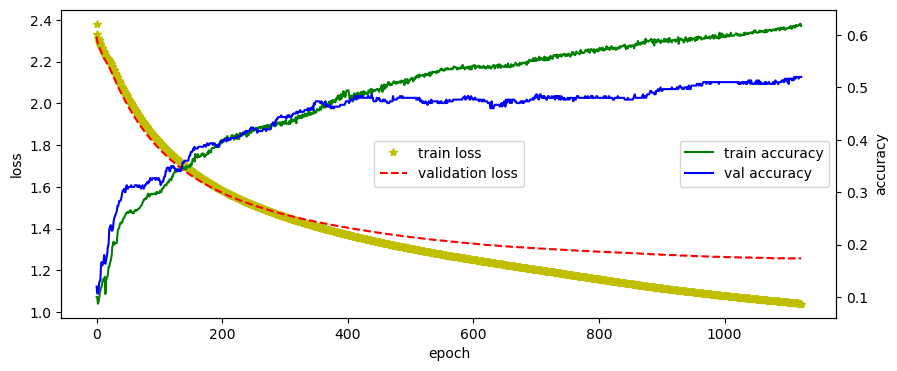

In [9]:




# 1번
((X_train,Y_train),(X_test,Y_test))=mnist.load_data()

#훈련셋(6만)= 5만개 +만개(val)
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

# 독립변수 전처리 :(5000,28,28) ->(50000,784)-> 실수형변환 -> 스케일조정(255.00으로나눠)
X_train=X_train.reshape(-1,784).astype('float32')/255.0
X_val = X_val.reshape(-1,784).astype('float32')/255.0
X_test = X_test.reshape(-1,784).astype('float32')/255.0
X_train.shape,X_val.shape,X_test.shape

# 훈련셋(5만)과 검증셋(만)-> 700개,300개만 random으로 choice
train_idxs=np.random.choice(50000,700)
val_idxs=np.random.choice(10000,300)

X_train= X_train[train_idxs]
Y_train= Y_train[train_idxs]
X_val = X_val[val_idxs]
Y_val = Y_val[val_idxs]

# 종속변수 전처리: 원핫 인코딩(to_categorical(넘파이배열)pd.get_dummies(데이터프레임을 반환))
print('원핫인코딩 전 shape:',Y_train.shape,Y_val.shape,Y_test.shape)
#원핫인코딩
Y_train = to_categorical(Y_train,10)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)
print('원핫인코딩 전 shape:',Y_train.shape,Y_val.shape,Y_test.shape)

# 모델구성하기
model= Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2,activation='relu'))
model.add(Dense(units=10,activation='softmax'))
model.summary()
# 모델 학습과정 설정
model.compile(loss='categorical_crossentropy',optimizer = 'sgd',metrics=['accuracy'])
# 모델 학습(콜백 적용)
from tensorflow.keras.callbacks import EarlyStopping
earlyStopping = EarlyStopping(patience=20) # val_accuracy가 연달아 2번이상 성능이 좋아지지않으면 stop(loss,accuracy,val_loss,val_accuracy)
hist = model.fit(X_train, Y_train , epochs=2000,batch_size=100,
                validation_data=(X_val,Y_val),
                callbacks=[earlyStopping])

# 학습과정 중의 loss와 accuracy
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,4))
loss_ax.plot(hist.history['loss'],'y*',label='train loss')
loss_ax.plot(hist.history['val_loss'],'r--',label='validation loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'],'g',label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'],'b',label='val accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center')
acc_ax.legend(loc='center right')
plt.show()

위 모델(DNN)의 accuracy 늘리기
- 데이터확보
- 레이어
- 활성화 함수 : 은닉층에는 주로 relu계열사용
- optimizer,epoch 등을 조정

원핫인코딩 전 shape: (50000,) (10000,) (10000,)
원핫인코딩 전 shape: (50000, 10) (10000, 10) (10000, 10)
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 64)                50240     
                                                                 
 dense_48 (Dense)            (None, 16)                1040      
                                                                 
 dense_49 (Dense)            (None, 10)                170       
                                                                 
Total params: 51,450
Trainable params: 51,450
Non-trainable params: 0
_________________________________________________________________
epoch:5,loss:0.34540727734565735,acc:0.9010800123214722,val_loss:0.2978772819042206,val_acc:0.9174000024795532
epoch:25,loss:0.1570671945810318,acc:0.9542199969291687,val_loss:0.16207653284072876,val_acc:0.95389997959136

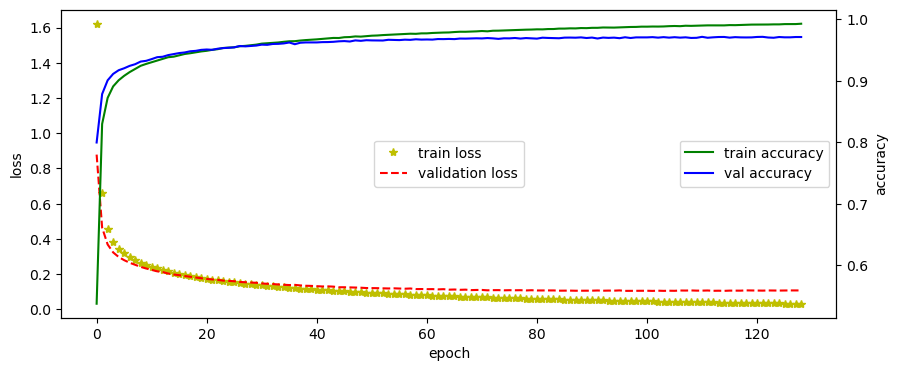

In [20]:
# 너무 자주 로그를 출력하면 지저분해질 수 있으니, 특정 에포크 간격마다 로그 출력하도록 제한
import tensorflow.keras.callbacks as callbacks
class CustomHistory(callbacks.Callback): # on_epoch_end()
    def __init__(self): # 생성자함수
        self.epoch=0
    def on_epoch_end(self, batch,logs={}):
        self.epoch += 1
        if self.epoch%20 ==5:
            print('epoch:{},loss:{},acc:{},val_loss:{},val_acc:{}'.\
                 format(self.epoch,logs.get('loss'),logs.get('accuracy'),logs.get('val_loss'),logs.get('val_accuracy')))
# 1번
((X_train,Y_train),(X_test,Y_test))=mnist.load_data()

#훈련셋(6만)= 5만개 +만개(val)
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

# 독립변수 전처리 :(5000,28,28) ->(50000,784)-> 실수형변환 -> 스케일조정(255.00으로나눠)
X_train=X_train.reshape(-1,784).astype('float32')/255.0
X_val = X_val.reshape(-1,784).astype('float32')/255.0
X_test = X_test.reshape(-1,784).astype('float32')/255.0
X_train.shape,X_val.shape,X_test.shape


# 종속변수 전처리: 원핫 인코딩(to_categorical(넘파이배열)pd.get_dummies(데이터프레임을 반환))
print('원핫인코딩 전 shape:',Y_train.shape,Y_val.shape,Y_test.shape)
#원핫인코딩
Y_train = to_categorical(Y_train,10)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)
print('원핫인코딩 전 shape:',Y_train.shape,Y_val.shape,Y_test.shape)

# 모델구성하기
model= Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=10,activation='softmax'))
model.summary()
# 모델 학습과정 설정
model.compile(loss='categorical_crossentropy',optimizer = 'sgd',metrics=['accuracy'])
# 모델 학습(콜백 적용)
from tensorflow.keras.callbacks import EarlyStopping
earlyStopping = EarlyStopping(patience=30) # val_accuracy가 연달아 2번이상 성능이 좋아지지않으면 stop(loss,accuracy,val_loss,val_accuracy)
customHistory = CustomHistory()
hist = model.fit(X_train, Y_train , epochs=1000,batch_size=100,
                validation_data=(X_val,Y_val),
                callbacks=[earlyStopping,customHistory],verbose=0)



## 5. 모델평가(그래프,평가함수)

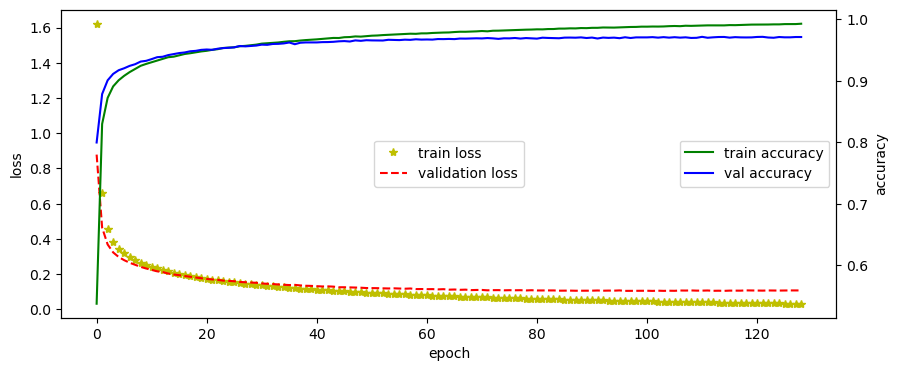

In [21]:
# 학습과정 중의 loss와 accuracy
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,4))
loss_ax.plot(hist.history['loss'],'y*',label='train loss')
loss_ax.plot(hist.history['val_loss'],'r--',label='validation loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'],'g',label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'],'b',label='val accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center')
acc_ax.legend(loc='center right')
plt.show()

In [22]:
# 모델평가
loss_and_metrics = model.evaluate(X_test,Y_test,batch_size=100)
print('loss:',loss_and_metrics[0])
print('accuarcy:', loss_and_metrics[1])

100/100 [==============================] - 0s 3ms/step - loss: 0.0988 - accuracy: 0.9688
loss: 0.09883251786231995
accuarcy: 0.9688000082969666


## 6.모델저장
- 1. 학습된 모델 저장: h5파일(모델 로드시 추가 학습이 필요 x)
- 2. 모델 구성만 저장: json파일 (모델 로드시 추가학습이 필요 o)

In [23]:
# 학습된 모델 저장
model.save('model/mnist.h5')

In [25]:
# 학습된 모델 로드하기
from tensorflow.keras.models import load_model
model2=  load_model('model/mnist.h5')
model2.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 64)                50240     
                                                                 
 dense_48 (Dense)            (None, 16)                1040      
                                                                 
 dense_49 (Dense)            (None, 10)                170       
                                                                 
Total params: 51,450
Trainable params: 51,450
Non-trainable params: 0
_________________________________________________________________


In [26]:
model2.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0988 - accuracy: 0.9688


[0.09883249551057816, 0.9688000082969666]

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
2


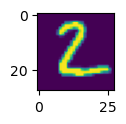

In [28]:
plt.figure(figsize=(1,1))
plt.imshow(X_test[1].reshape(28,28))
print(Y_test[1])
print(Y_test[1].argmax())
plt.show()


In [29]:
# 모델 사용하기
X_test[0].shape

(784,)

In [34]:
result = model2.predict(X_test[0].reshape(1,784))
print('실제값(원핫인코딩) :', Y_test[0])
print('실제값 :', Y_test[0].argmax())
print('예측값(원핫인코딩):', [round(r,4) for r in result[0]])
print('예측값 : ', result.argmax())

1/1 [==============================] - 0s 24ms/step
실제값(원핫인코딩) : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
실제값 : 7
예측값(원핫인코딩): [0.0, 0.0, 0.0, 0.0016, 0.0, 0.0, 0.0, 0.9983, 0.0, 0.0]
예측값 :  7


In [35]:
# 2. 모델의 구조만 저장
model_json = model.to_json()
with open('model/mnist.json','w')as f:
    f.write(model_json)

In [36]:
# 저장된 모델 구성 가져오기
with open ('model/mnist.json','r')as f:
    model_json2 = f.read()

In [39]:
from tensorflow.keras.models import model_from_json
model3 = model_from_json(model_json2)
model3.summary() # 학습전 모델

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 64)                50240     
                                                                 
 dense_48 (Dense)            (None, 16)                1040      
                                                                 
 dense_49 (Dense)            (None, 10)                170       
                                                                 
Total params: 51,450
Trainable params: 51,450
Non-trainable params: 0
_________________________________________________________________


In [41]:
model3.compile(loss="categorical_crossentropy",optimizer='nadam', metrics=['accuracy'])
model3.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 2.3391 - accuracy: 0.0885


[2.339136838912964, 0.0885000005364418]

In [43]:
model3.fit(X_train,Y_train,epochs=100, batch_size=500,
          validation_data=[X_val,Y_val],
          callbacks=[earlyStopping])


Epoch 1/100
100/100 [==============================] - 2s 9ms/step - loss: 0.9223 - accuracy: 0.7451 - val_loss: 0.3453 - val_accuracy: 0.9076
Epoch 2/100
100/100 [==============================] - 1s 8ms/step - loss: 0.3025 - accuracy: 0.9165 - val_loss: 0.2309 - val_accuracy: 0.9367
Epoch 3/100
100/100 [==============================] - 1s 9ms/step - loss: 0.2278 - accuracy: 0.9355 - val_loss: 0.1927 - val_accuracy: 0.9460
Epoch 4/100
100/100 [==============================] - 1s 8ms/step - loss: 0.1905 - accuracy: 0.9456 - val_loss: 0.1718 - val_accuracy: 0.9528
Epoch 5/100
100/100 [==============================] - 1s 8ms/step - loss: 0.1665 - accuracy: 0.9517 - val_loss: 0.1569 - val_accuracy: 0.9565
Epoch 6/100
100/100 [==============================] - 1s 8ms/step - loss: 0.1480 - accuracy: 0.9575 - val_loss: 0.1469 - val_accuracy: 0.9595
Epoch 7/100
100/100 [==============================] - 1s 8ms/step - loss: 0.1343 - accuracy: 0.9605 - val_loss: 0.1379 - val_accuracy: 0.9619

In [45]:
# 1번
((X_train,Y_train),(X_test,Y_test))=mnist.load_data()

#훈련셋(6만)= 5만개 +만개(val)
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

# 독립변수 전처리 :(5000,28,28) ->(50000,784)-> 실수형변환 -> 스케일조정(255.00으로나눠)
X_train=X_train.reshape(-1,784).astype('float32')/255.0
X_val = X_val.reshape(-1,784).astype('float32')/255.0
X_test = X_test.reshape(-1,784).astype('float32')/255.0
X_train.shape,X_val.shape,X_test.shape

# 훈련셋(5만)과 검증셋(만)-> 700개,300개만 random으로 choice
train_idxs=np.random.choice(50000,700)
val_idxs=np.random.choice(10000,300)

X_train= X_train[train_idxs]
Y_train= Y_train[train_idxs]
X_val = X_val[val_idxs]
Y_val = Y_val[val_idxs]

# 종속변수 전처리: 원핫 인코딩(to_categorical(넘파이배열)pd.get_dummies(데이터프레임을 반환))
print('원핫인코딩 전 shape:',Y_train.shape,Y_val.shape,Y_test.shape)
#원핫인코딩
Y_train = to_categorical(Y_train,10)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)
print('원핫인코딩 전 shape:',Y_train.shape,Y_val.shape,Y_test.shape)

model = load_model('model/mnist.h5')

원핫인코딩 전 shape: (700,) (300,) (10000,)
원핫인코딩 전 shape: (700, 10) (300, 10) (10000, 10)


In [47]:
Y_test.argmax(axis=1)  # 실제값


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [52]:
Y_hat = model.predict(X_test).argmax(axis=1)
Y_hat

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [53]:
ctab = pd.crosstab(Y_test.argmax(axis=1),Y_hat)

ctab

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,958,0,1,2,1,6,5,3,2,2
1,0,1120,3,4,0,0,4,1,3,0
2,5,3,997,4,2,0,4,9,7,1
3,2,0,5,977,0,11,1,7,5,2
4,2,1,2,1,950,0,7,2,1,16
5,2,2,0,9,1,862,7,1,6,2
6,6,3,3,1,5,5,933,0,2,0
7,1,5,8,7,3,0,0,995,3,6
8,7,0,7,12,6,9,3,2,924,4


In [54]:
ctab.sum(axis=1)

row_0
0     980
1    1135
2    1032
3    1010
4     982
5     892
6     958
7    1028
8     974
9    1009
dtype: int64